In [79]:
import os
import sys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

IMPORTING DATASET AND CLEANING

In [80]:
df = pd.read_csv("C:\Internship\LIFE_EXPECTANCY_PREDICTION\dataset\Life Expectancy Data.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Kathit\AppData\Local\Temp\ipykernel_2076\3815743110.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("C:\Internship\LIFE_EXPECTANCY_PREDICTION\dataset\Life Expectancy Data.csv")


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [81]:
df.info()
print("\n🔹 Missing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [82]:
df=df.dropna()

In [83]:
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [84]:
print("Shape:",df.shape)

Shape: (1649, 22)


In [85]:
df.columns = df.columns.str.strip()


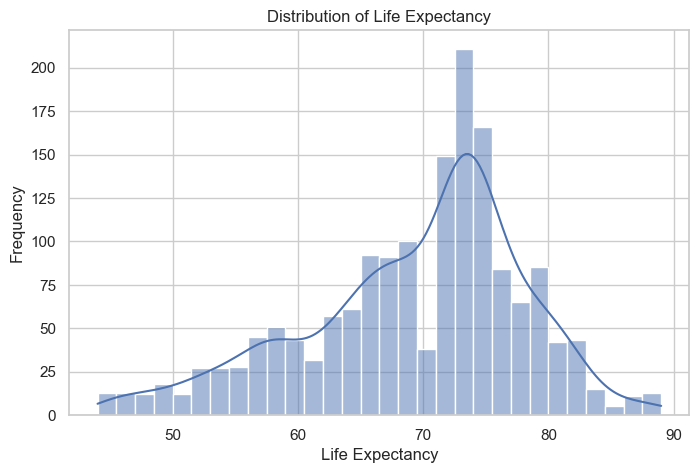

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy"], bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

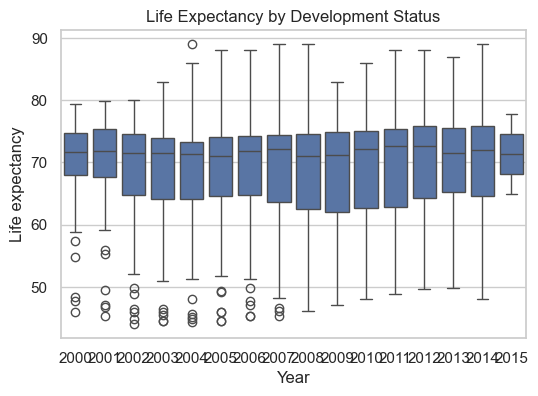

In [87]:
# 2. Boxplot by Development Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Year", y="Life expectancy")
plt.title("Life Expectancy by Development Status")
plt.show()

In [88]:
# Function to remove outliers for all numeric columns using IQR
def remove_all_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_clean = df.copy()
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Apply the function
df_clean = remove_all_outliers_iqr(df)

# ✅ Summary
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)

Original shape: (1649, 22)
Shape after removing outliers: (395, 22)


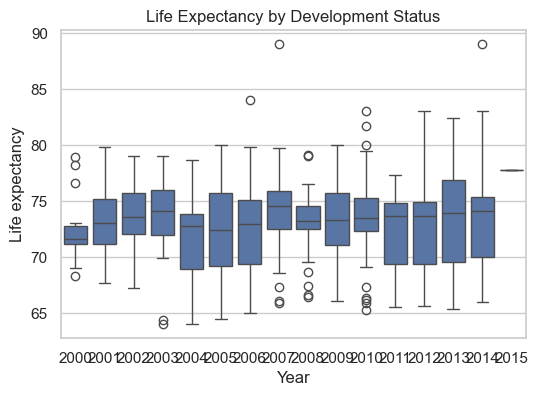

In [89]:
# 2. Boxplot by Development Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x="Year", y="Life expectancy")
plt.title("Life Expectancy by Development Status")
plt.show()

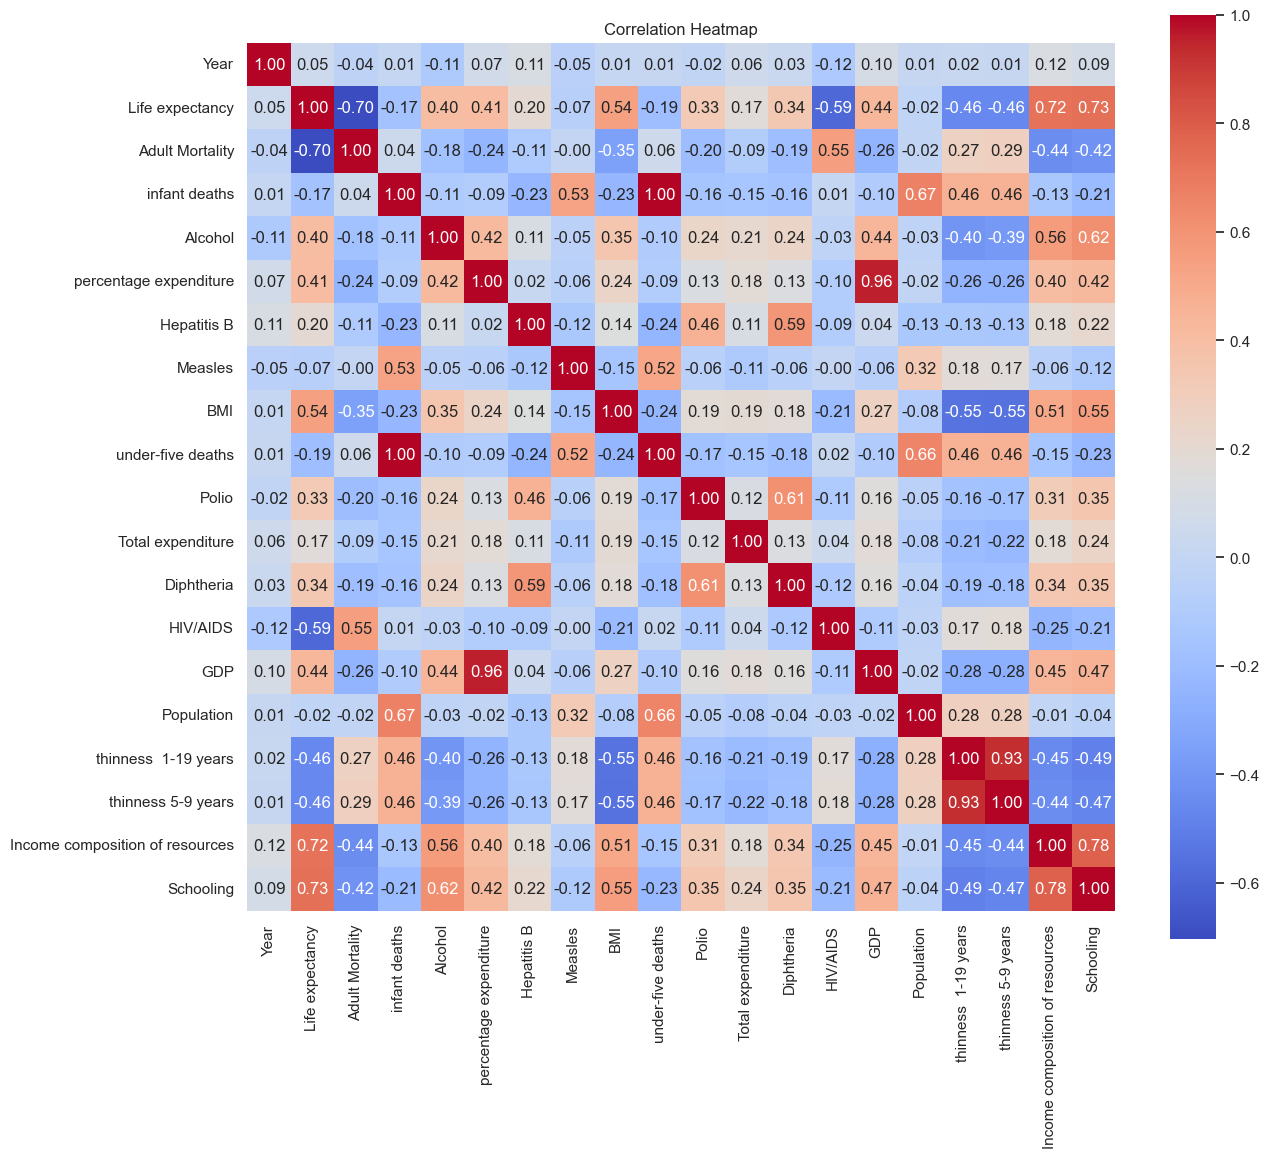

In [90]:
plt.figure(figsize=(14, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [91]:
# Drop unimportant columns
df_cleaned = df.drop(columns=[
    'Year',
    'Measles',
    'Total expenditure',
    'Population',
    'Hepatitis B'
])

print("Remaining columns:\n", df_cleaned.columns.tolist())


Remaining columns:
 ['Country', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [92]:
df_cleaned.shape
#df.shape
df_clean.shape

(395, 22)

In [93]:
df_cleaned.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,19.1,83,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,18.6,86,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,18.1,89,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,17.6,93,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,17.2,97,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [94]:
df_cleaned.columns = df_cleaned.columns.str.strip()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Encode categorical variables
le = LabelEncoder()
df_cleaned['Country'] = le.fit_transform(df_cleaned['Country'])  # Optional: you can drop it instead if it causes noise
df_cleaned['Status'] = le.fit_transform(df_cleaned['Status'])

# Define features and target
features = ['Country', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
            'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
             'thinness 5-9 years', 'Income composition of resources', 'Schooling']
X = df_cleaned[features]
y = df_cleaned['Life expectancy']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2.80
Root Mean Squared Error (RMSE): 3.65
R² Score: 0.81


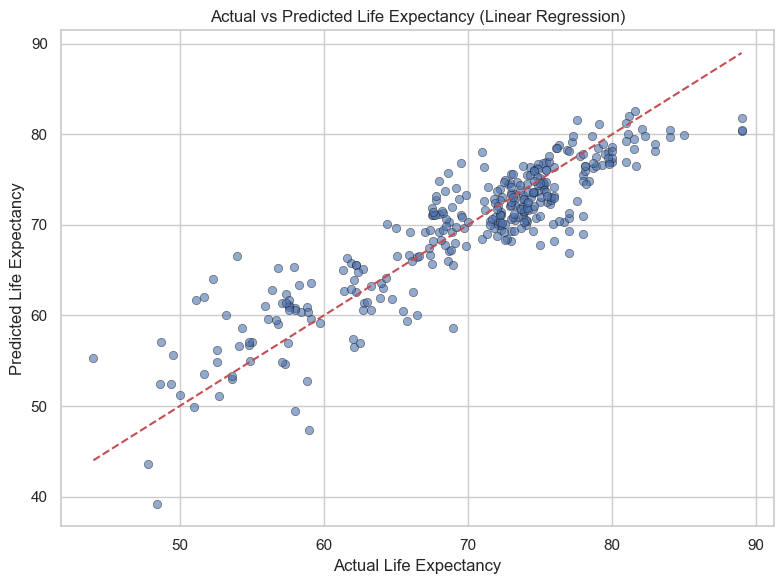

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

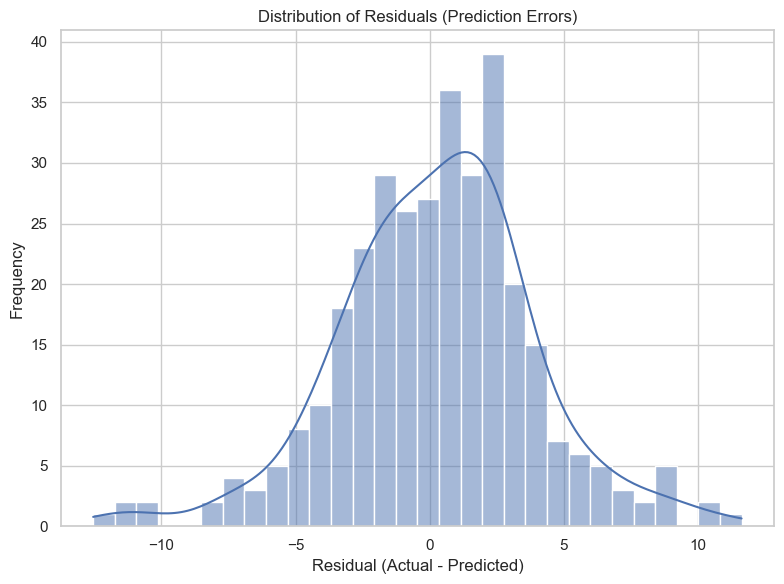

In [97]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Prediction Errors)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']